<a href="https://colab.research.google.com/github/MaddalenaDona/Measles/blob/main/Figure5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import math
from ipywidgets import interact

@interact
def R(v_i=0.90, R_0=15, n_c=25, pi=0.5): #interactive parameters with default settings
# pi must be <= than v for the model to be consistent
  lambda_G=(R_0**2)/(R_0+n_c-1) #global infection rate
  R=[] #basic reproduction number
  v=[] #fraction of vaccinated
  v_c=np.linspace(0,1-v_i,100) #fraction of converted
  for i in range(len(v_c)-1):
    v.append(v_i+v_c[i])
    if v[i]==1:
      R.append(0)
    else:
      u=(1-v[i])/(1-pi)
      R.append((1+(n_c-1)*u)*(1-v[i])*lambda_G)

  for i in range(len(R)):
    if R[i]>=1 and R[i+1]<1:
      idx=i

  plt.figure(figsize=(10,8))
  plt.plot(v_c[0:len(v_c)-1],R,'k')
  plt.plot(v_c[idx], R[idx], 'r*')
  #plt.xlabel('$v_c$=number of people converted after the mandate')
  #plt.ylabel('$R_*$')
  #plt.title('$R_*$ as a function of $v_c$')
  return plt.figure()

interactive(children=(FloatSlider(value=0.9, description='v_i', max=2.7, min=-0.9), IntSlider(value=15, descri…

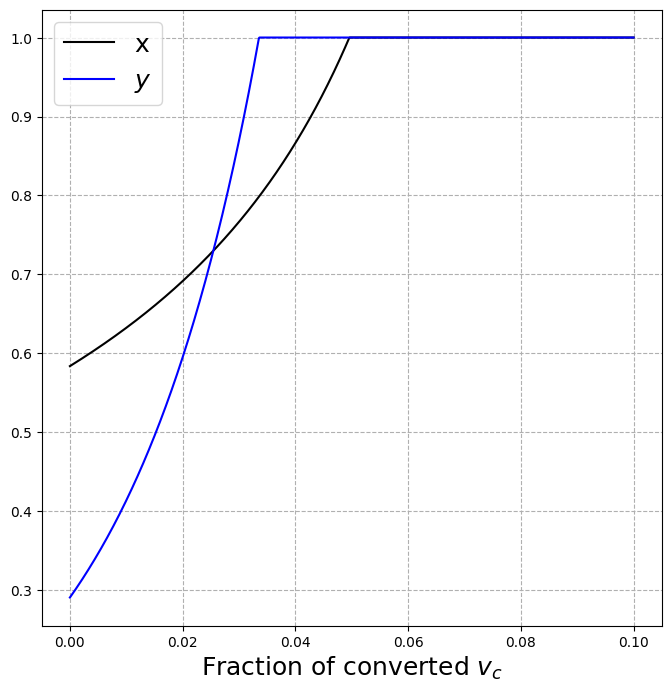

In [ ]:
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, v, pi):
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(24)
  return np.exp(-5.8*(1-v)*(1-z))

def fun(x, v):
  y=x*(x*(1-v)+v)**(24)
  return y

v_i=0.9
v_c=np.linspace(0,1-v_i,1000)
v=[]
pi=0.5
X=[]
X1=[]
Y=[]
for i in range(len(v_c)):
  v.append(v_i+v_c[i])
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi))) #creating a list of values of the probability x. Each entry i corresponds to a
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))


plt.figure(figsize=(8,8))
plt.plot(v_c,X,'k', label='x')
plt.plot(v_c,Y,'b', label=r'$y$')
plt.grid(ls='--')
plt.xlabel('Fraction of converted $v_c$', fontsize=18)
plt.legend(fontsize=18)